# Getting Started with Matplotlib

![Matplotlib logo](https://matplotlib.org/stable/_images/sphx_glr_logos2_003.png)

## Objectives:

1. Download matplotlib
2. Understanding matplotlib figures
3. Create a basic plot
4. Plotting with 2D data
5. Using matplotlib to create a geophysical plot
6. Making a plotting script

## Other Resources:
- [Matplotlib's example gallery](https://matplotlib.org/stable/gallery/index.html)
- [Curated matplotlib examples](https://matplotlib.org/stable/tutorials/introductory/sample_plots.html)
- [A good interactive matplotlib tutorial from datacamp](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python)
- [A good pickle tutorial from datacamp](https://www.datacamp.com/community/tutorials/pickle-python-tutorial)

## Set up

We are going to need to install matplotlib (and numpy if you haven't from the previous session) into your conda environment. You can do that straight from the jupyter notebook by running the cell below.

After installing these packages, you will want to restart the Kernel. You can do this by going to the Kernel tab in Jupyter lab and clicking `Restart Kernel`.

Next, we can set matplotlib to display all plots created inline in this Jupyter notebook by using the following magic command.

In [1]:
%matplotlib inline

And finally, we can import matplotlib and numpy into the notebook.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

For the purpose of clarity, notice that we are importing [matplotlib's pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) interface as plt.

## Anatomy of a matplotlib figure

![Matplotlib logo](https://matplotlib.org/stable/_images/anatomy.png)

Matplotlib has two core objects: [Figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.html) and [Axes](https://matplotlib.org/stable/api/axes_api.html). The `Figure` keeps track of all the child `Axes` or other [Artists](https://matplotlib.org/stable/api/artist_api.html). Almost everything in a matplotlib figure is a type of `Artist`, including `Figure`s and `Axes` themselves. Other types of `Artist`s include [Text](https://matplotlib.org/stable/api/text_api.html) and [Legend](https://matplotlib.org/stable/api/legend_api.html), for example.

## Basic plot

Use numpy to define two small arrays.

In [3]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 5, 1])

Create a plot with matplotlib by making a figure, the axes, and then plotting.

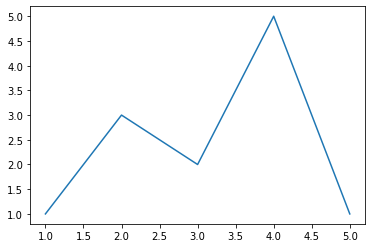

In [4]:
# Create a figure
fig = plt.figure()

# Get axes from figure
ax = plt.gca()

# Plot the x and y variables created above from the axes object.
ax.plot(x,y);

However, you don't explicity have to call the figure and axes before making a plot. Many matplotlib calls will make them for you. For instance, the same plot can be created in one call:

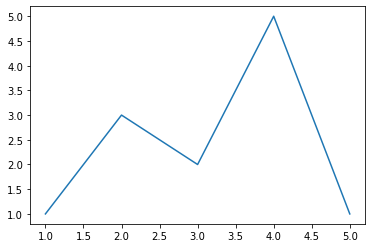

In [5]:
plt.plot(x,y);

There are lots of different ways to make a plot and reference it's figure and axes. Below, we create a figure explicitly, and then use `plt.gca()` to get the current axes.

Using [plt.plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) we can provide many optional input arguments that change the way a plot looks. 

Let's make a plot with [subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html), showing our original plot on the left, and one with style changes on the right.

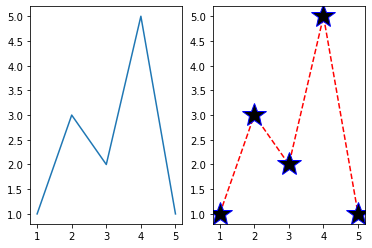

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].plot(x,y)
ax[1].plot(x,y, color='red', ls='--', marker='*', 
          markersize=25, markerfacecolor='k',
          mec='b');

# 2D Plot
We've done line plots, now let's do an example with 2-dimensional data.

We're going to create a set of 2D data with numpy by first defining an x and a y range, and then making a mesh to compute over to generate the data.

In [7]:
x = np.arange(-3.0, 3.0, 0.05)
y = np.arange(-3.0, 3.0, 0.05)


X, Y = np.meshgrid(x, y)
Z = np.cos(X) + np.sin(Y)

Now, let's make a plot of what we created using matplotlib's [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html), which displays data as an image.

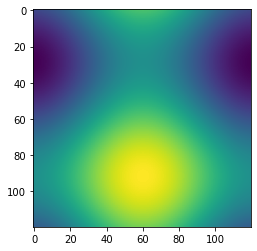

In [8]:
fig, ax = plt.subplots()

im = ax.imshow(Z)

Notice that the x and y scales seem really off. This is because matplotlib isn't aware of the range we originally made x and y with and is using the actual number of points to mark the axes. We can adjust this by setting the `extent` on the original call.

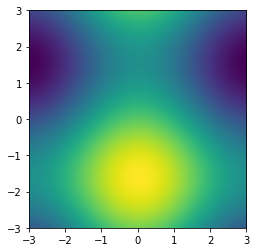

In [9]:
im = ax.imshow(Z, extent=[-3,3,-3,3])
fig

There are of course other things we can change about this plot. For one, you might notice how smooth it looks. This is because, by default, `imshow` uses and antialiased interpolation method. We can also change the color map used and add a colorbar to understand the values displayed better. There are a ton of [colormap options](https://matplotlib.org/stable/tutorials/colors/colormaps.html) and you can make your own, too. 

For a full list of imshow options, look at the documentation.

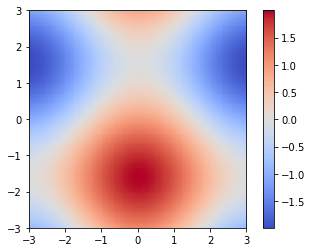

In [10]:
im = ax.imshow(Z, interpolation='none', cmap='coolwarm', extent=[-3,3,-3,3])
cbar = fig.colorbar(im)
fig

This is not the only way to display 2D data. There are several other matplotlib functions commonly used for this purpose, such as [contour](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html) and [contourf](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html).

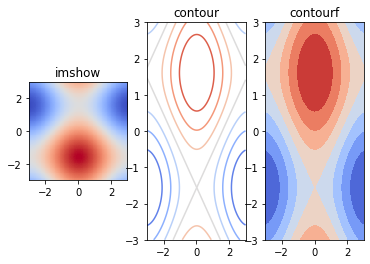

In [11]:
# Make 1x3 subplots
fig, ax = plt.subplots(nrows=1, ncols=3)

# Plot the imshow we made above on the first plot
ax[0].imshow(Z, interpolation='none', cmap='coolwarm', extent=[-3,3,-3,3])
ax[0].set_title('imshow')

# Plot the same data with contour
ax[1].contour(Z, cmap='coolwarm', extent=[-3,3,-3,3])
ax[1].set_title('contour')

# Plot the same data again with contourf
ax[2].contourf(Z, cmap='coolwarm', extent=[-3,3,-3,3])
ax[2].set_title('contourf');

You'll notice that the axes for imshow are square, while the axes from contour and contourf are stretched. This is because imshow is designed to show images. You'll also notice that the y axis appears to be flipped. This is because the first plot os actually incorrect. By default, imshow places [0, 0] in the upper left corner, as would be expected with image data, while our [0, 0] should actually be in the lower left corner. We can address both of these issues below.

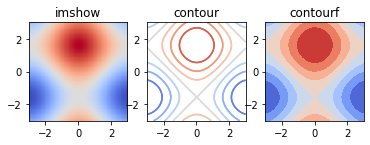

In [12]:
# Plot the imshow we made above on the first plot
ax[0].imshow(Z, interpolation='none', cmap='coolwarm', extent=[-3,3,-3,3], origin='lower')
ax[0].set_title('imshow')

# Plot the same data with contour
ax[1].contour(Z, cmap='coolwarm', extent=[-3,3,-3,3])
ax[1].set_title('contour')
ax[1].set_aspect('equal')

# Plot the same data again with contourf
ax[2].contourf(Z, cmap='coolwarm', extent=[-3,3,-3,3])
ax[2].set_title('contourf')
ax[2].set_aspect('equal')

fig

## Plotting the Southern Oscillation Index

This part of the tutorial is a version of a [GeoCAT-Examples plot](https://geocat-examples.readthedocs.io/en/latest/gallery/XY/NCL_xy_5.html#sphx-glr-gallery-xy-ncl-xy-5-py) that has been simplified for the purposes of this tutorial. For way more geoscience examples that recreate original NCL examples, see the [GeoCAT-Examples gallery](https://geocat-examples.readthedocs.io/en/latest/).

We're going to use a python module called [pickle](https://docs.python.org/3/library/pickle.html). Pickle allows us to convert Python objects can be saved as binary files. You don't need to worry about it, other than it is convenient. Note that pickle files are not secure, though, and make sure you trust the files you use.

In [13]:
import pickle

Load the date from the picke file. 

In [14]:
# open the binary file
infile = open('../data/soi.pkl', 'rb')

# the three variables are stored in a single array, 
# can be unpacked in the load call directly
[date, soi, dsoi] = pickle.load(infile)

# close the file
infile.close()

Make a figure, similar to above, and plot the data to see what it looks like.

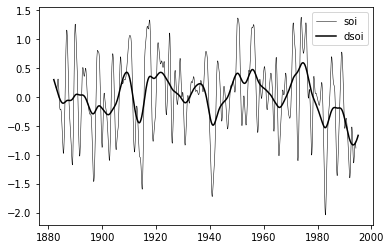

In [15]:
# Plot data
fig = plt.figure()
ax = plt.gca()

ax.plot(date, soi, color='black', linewidth=0.5, label="soi")
ax.plot(date, dsoi, color='black', label='dsoi')

# add a legend
plt.legend();

It's kind of hard to tell what's happening. Let's add a line through y=0.

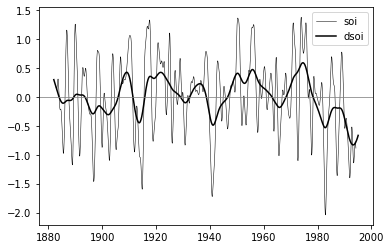

In [16]:
# Add horizonal line
ax.axhline(y=0, color='grey', linewidth=0.75)
fig

We can also compress and center the y axis to more clearly see the data. Lets also change the figure size to extend the x-axis.

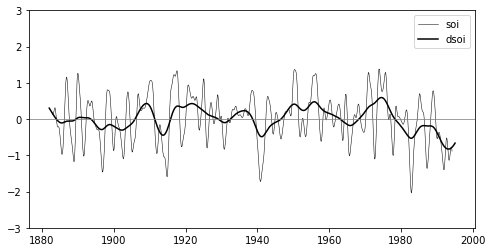

In [17]:
# set axis range
ax.set_ylim([-3,3])

# Set figure size
fig.set_size_inches(8,4)

fig

And let's add some colors to the plot, shading it red above y=0 and blue below y=0

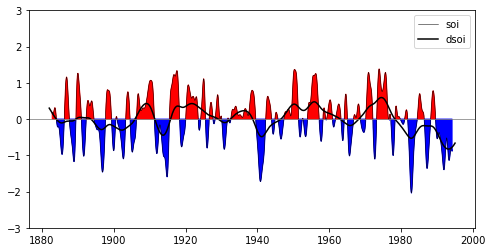

In [18]:
# Fill above and below y=0
ax.fill_between(date, soi, where=soi > 0, color='red')
ax.fill_between(date, soi, where=soi < 0, color='blue')
fig

That looks good, let's add some titles and axes labels to finish it up.

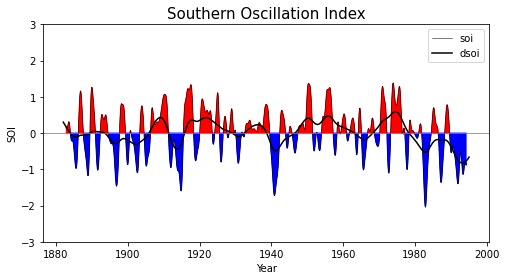

In [19]:
ax.set_title("Southern Oscillation Index", fontsize=15)
ax.set_xlabel('Year')
ax.set_ylabel('SOI')
fig

# Making a Plotting Script

Let's convert the plot we just made into a python script that can be executed from the command line.

First, open a new file, called something like `soi_plot.py`. In this file, we can create a script from the code blocks. Feel free to copy and paste this bit below into your file.

``` python
import matplotlib.pyplot as plt
import numpy as np
import pickle

# open the binary file
infile = open('soi.pkl', 'rb')

# the three variables are stored in a single array, 
# can be unpacked in the load call directly
[date, soi, dsoi] = pickle.load(infile)

# close the file
infile.close()

# Make figure
plt.figure(figsize=(8,4))
ax = plt.gca()

# Add horizonal line
ax.axhline(y=0, color='grey', linewidth=0.75)

# Plot data
ax.plot(date, soi, color='black', linewidth=0.5)
ax.plot(date, dsoi, color='black')

# Fill above and below y=0
ax.fill_between(date, soi, where=soi > 0, color='red')
ax.fill_between(date, soi, where=soi < 0, color='blue')

# set axis range
ax.set_ylim([-3,3])

# label axes
plt.xlabel('Year')
plt.ylabel('SOI')
plt.title('Southern Oscillation Index', fontsize=15)

plt.show()
#plt.savefig('soi.png')
```

The main difference between plotting in a script versus plotting in the Jupyter notebook is the last call at the botton: `plot.show()`. This call is necessary for the plot to appear. Without it, the plot will be created, but not displayed.

Let's run this script. Open up a terminal in Jupyter Lab. Run it by executing the command:

It can also be executed directly from the jupyter notebook by executing the following cell:

In [20]:
import myfirstplot

ModuleNotFoundError: No module named 'myfirstplot'